In [1]:
%load_ext autoreload
%autoreload 2
from RTKToArrayConversion import *
from ExtendedConeBeamDCC import *
from TextFileSaving import * 
from ConeBeamDCCWithBackprojectionPlane import *

In [12]:
filesdir_ref = ""
# reading projections
proj = itk.imread(filesdir_ref+"corrected_proj.mha")
# Reading the geometry of the scanner
xmlreader = rtk.ThreeDCircularProjectionGeometryXMLFileReader.New()
xmlreader.SetFilename(filesdir_ref+'geometry.xml')
# xmlreader.SetFilename(filesdir_ref+"geometry.xml")
xmlreader.GenerateOutputInformation()
geometry = xmlreader.GetOutputObject()
print('nproj = %d'%(len(geometry.GetGantryAngles())))
print(proj.GetLargestPossibleRegion().GetSize())

nproj = 44768
itkSize3 ([920, 32, 44768])


In [13]:
#Convert to array for faster computation
geometry_array = RTKtoNP(geometry)
proj_array = itk.GetArrayFromImage(proj)
proj_infos = GetProjectionInformations(proj)
source_pos_array = GetSourcePositions(geometry)
rotation_matrices_array = GetRotationMatrices(geometry)
fixed_matrices_array = GetFixedSystemMatrices(geometry)
print(proj_infos)

[array([1.02806101, 1.0947541 , 1.        ]), array([0., 0., 0.]), array([  920,    32, 44768]), array([[ 1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  1.]])]


In [14]:
print(np.where(geometry_array[8,:]>0))

(array([    0,     1,     2, ..., 27208, 27209, 27210]),)


In [37]:
from joblib import Parallel, delayed
from tqdm import tqdm_notebook
import time

ref = 27210
res = []
res_bp = []
idx_bp = []

for i in tqdm_notebook(range(-768,768)):
    res.append(ComputeDCCsForOnePair(ref, i + ref, geometry_array, source_pos_array, rotation_matrices_array, fixed_matrices_array, proj_array, proj_infos))

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


invalid value encountered in true_divide
invalid value encountered in true_divide


<IPython.core.display.Javascript object>


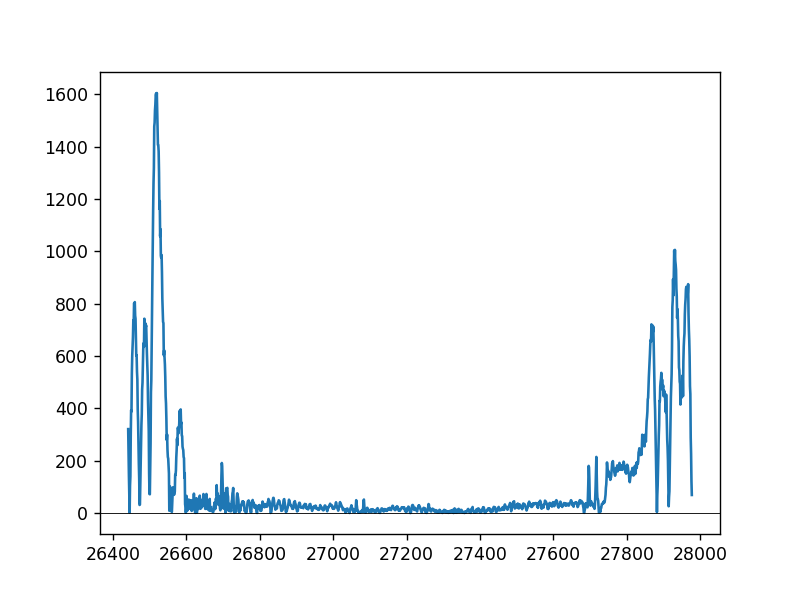

In [38]:
import matplotlib.pyplot as plt
%matplotlib notebook
# plot results
plt.figure()
plt.plot((np.arange(-768,768)+ref),res)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.show()
    

In [ ]:
# savedir = "/home/mmouchet/PycharmProjects/DccOnPhysicalDetectors/paper_dcc_simu/statistics/new_results/FOV2/"
# WriteMomentsFile(savedir+"thorax_b_360_920x1028_rect_W.csv",res, 4*N)